In [29]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_cherry_only_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [30]:
data

['t_n55         12.8747 (12.0398, 13.7708) (12.0120, 13.7353)  1.7233 (Jnode 106)\n',
 't_n56         12.7759 (11.9622, 13.6207) (11.9464, 13.6033)  1.6568 (Jnode 105)\n',
 't_n57         11.7627 (11.0428, 12.5139) (11.0184, 12.4853)  1.4669 (Jnode 104)\n',
 't_n58          9.9311 ( 9.3730, 10.5135) ( 9.3564, 10.4953)  1.1390 (Jnode 103)\n',
 't_n59          9.5407 ( 9.0134, 10.0968) ( 9.0094, 10.0916)  1.0822 (Jnode 102)\n',
 't_n60          9.0675 ( 8.5666,  9.5962) ( 8.5480,  9.5761)  1.0281 (Jnode 101)\n',
 't_n61          8.3629 ( 7.8988,  8.8578) ( 7.8983,  8.8572)  0.9589 (Jnode 100)\n',
 't_n62          3.9844 ( 3.5274,  4.4995) ( 3.4979,  4.4630)  0.9651 (Jnode 99)\n',
 't_n63          6.0945 ( 5.7052,  6.4880) ( 5.6902,  6.4689)  0.7787 (Jnode 98)\n',
 't_n64          4.5364 ( 4.1763,  4.8683) ( 4.1744,  4.8655)  0.6911 (Jnode 97)\n',
 't_n65          3.9881 ( 3.6530,  4.2901) ( 3.6621,  4.2972)  0.6351 (Jnode 96)\n',
 't_n66          3.1548 ( 2.8689,  3.4121) ( 2.8621,  3.40

In [31]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [32]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [33]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [34]:
posterior_mean_iqtree

[12.8747,
 12.7759,
 11.7627,
 9.9311,
 9.5407,
 9.0675,
 8.3629,
 3.9844,
 6.0945,
 4.5364,
 3.9881,
 3.1548,
 2.199,
 1.4919,
 0.6415,
 4.6288,
 9.1861,
 8.2013,
 8.3153,
 6.0486,
 5.3144,
 5.1767,
 8.9975,
 8.4556,
 8.0747,
 7.5829,
 6.9221,
 6.6415,
 5.7639,
 5.2251,
 4.7356,
 3.6121,
 3.2146,
 5.9039,
 4.7009,
 8.746,
 2.2073,
 8.47,
 7.8491,
 6.9638,
 6.3707,
 4.6909,
 5.2171,
 6.7054,
 6.3243,
 5.6434,
 4.6089,
 5.7125,
 10.5551,
 8.0085,
 5.113,
 4.1776,
 8.9424]

In [35]:
lower_ci_iqtree

[3.7708,
 3.6207,
 2.5139,
 0.373,
 0.0134,
 0.5666,
 0.8988,
 0.5274,
 0.7052,
 0.1763,
 0.653,
 0.8689,
 0.003,
 0.3609,
 0.6157,
 0.2728,
 0.6768,
 0.7118,
 0.8704,
 0.6556,
 0.9248,
 0.0474,
 0.5021,
 0.9869,
 0.6224,
 0.1648,
 0.5452,
 0.2771,
 0.4482,
 0.9418,
 0.4813,
 0.4271,
 0.0618,
 0.5543,
 0.3855,
 0.2573,
 0.8081,
 0.9953,
 0.4068,
 0.5581,
 0.9888,
 0.3719,
 0.8693,
 0.2999,
 0.9257,
 0.2478,
 0.2271,
 0.2497,
 0.9043,
 0.3729,
 0.5183,
 0.4935,
 0.095]

In [36]:
upper_ci_iqtree

[12.012,
 11.9464,
 11.0184,
 10.5135,
 10.0968,
 9.5962,
 8.8578,
 4.4995,
 6.488,
 4.8683,
 4.2901,
 3.4121,
 2.3948,
 1.6356,
 0.7008,
 4.9653,
 9.7237,
 8.7213,
 8.7977,
 6.4844,
 5.7453,
 5.484,
 9.516,
 8.9481,
 8.5512,
 8.0335,
 7.3422,
 7.0563,
 6.1488,
 5.5838,
 5.0796,
 3.9123,
 3.4987,
 6.2965,
 5.0484,
 9.2563,
 2.6423,
 8.9583,
 8.2991,
 7.3607,
 6.7284,
 5.0266,
 5.4897,
 7.1163,
 6.7251,
 6.037,
 4.9594,
 6.1754,
 11.2495,
 8.6475,
 5.7157,
 4.8516,
 9.8466]

In [37]:
file_LG = open("LG_cherry_only_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

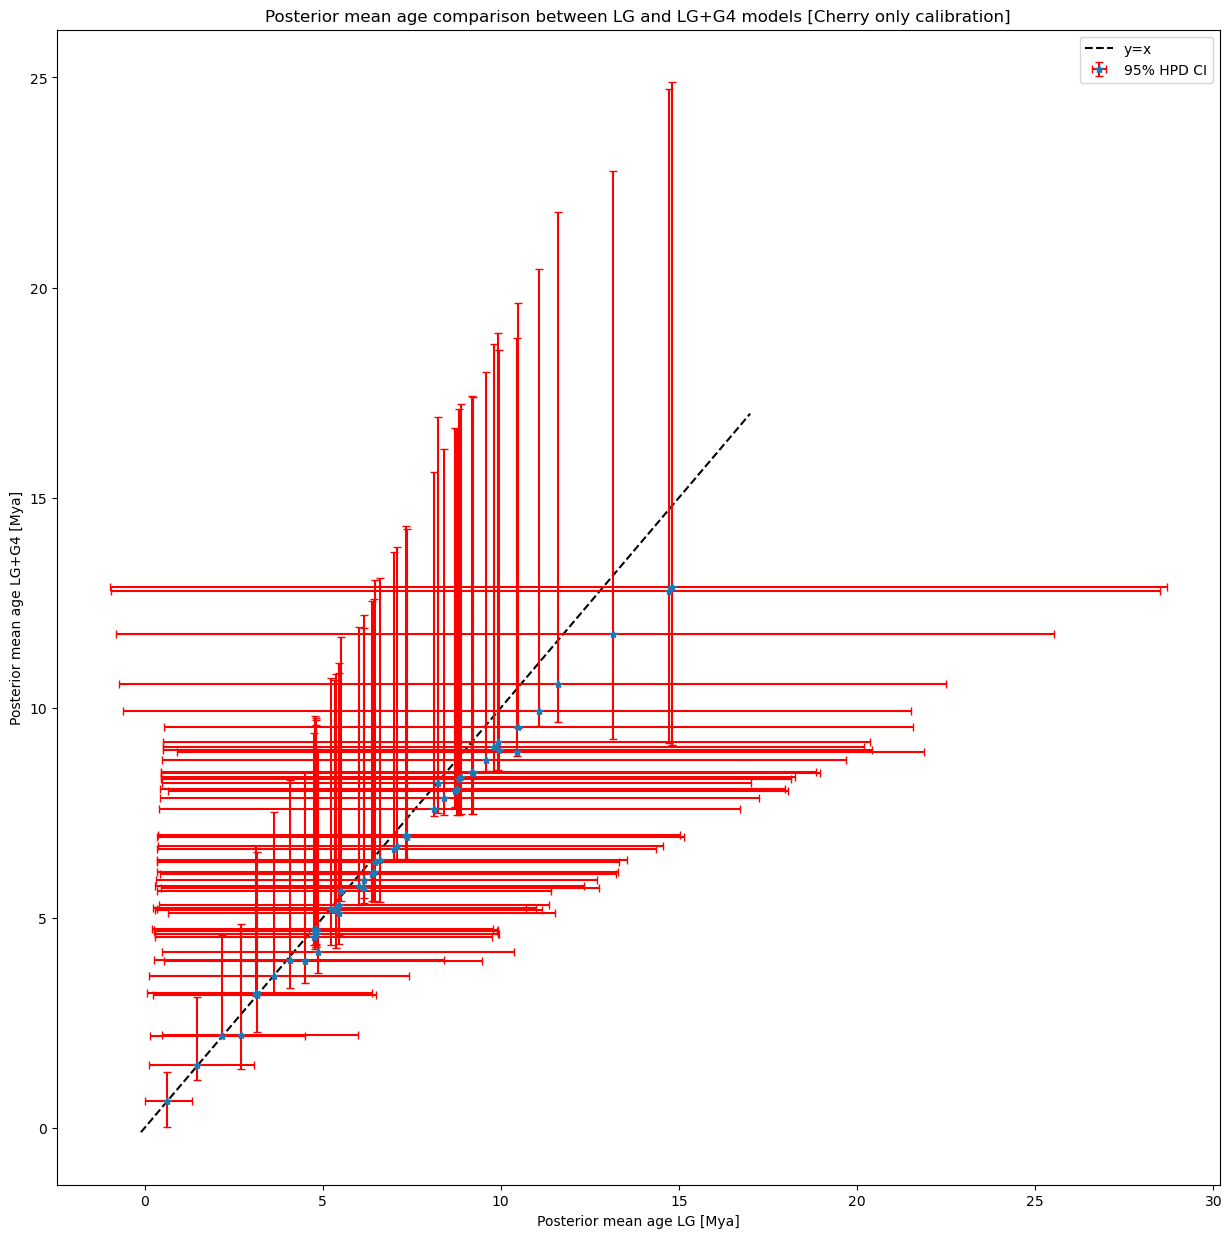

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Cherry only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_co.png')

In [39]:
posterior_mean_baseml

[14.8117,
 14.7114,
 13.1579,
 11.0589,
 10.4949,
 9.8228,
 8.8873,
 4.5045,
 6.4531,
 4.7468,
 4.0766,
 3.1552,
 2.1717,
 1.4798,
 0.6362,
 4.8084,
 9.9083,
 8.2483,
 8.8261,
 6.3902,
 5.4595,
 5.36,
 9.9417,
 9.2289,
 8.7576,
 8.1385,
 7.3734,
 6.9961,
 6.0182,
 5.3633,
 4.7739,
 3.6266,
 3.1194,
 6.1687,
 4.7997,
 9.5877,
 2.7172,
 9.1794,
 8.4084,
 7.3283,
 6.6006,
 4.8023,
 5.2294,
 7.0783,
 6.4674,
 5.5236,
 4.8052,
 6.1483,
 11.5997,
 8.7039,
 5.4564,
 4.882,
 10.4612]

In [40]:
posterior_mean_iqtree

[12.8747,
 12.7759,
 11.7627,
 9.9311,
 9.5407,
 9.0675,
 8.3629,
 3.9844,
 6.0945,
 4.5364,
 3.9881,
 3.1548,
 2.199,
 1.4919,
 0.6415,
 4.6288,
 9.1861,
 8.2013,
 8.3153,
 6.0486,
 5.3144,
 5.1767,
 8.9975,
 8.4556,
 8.0747,
 7.5829,
 6.9221,
 6.6415,
 5.7639,
 5.2251,
 4.7356,
 3.6121,
 3.2146,
 5.9039,
 4.7009,
 8.746,
 2.2073,
 8.47,
 7.8491,
 6.9638,
 6.3707,
 4.6909,
 5.2171,
 6.7054,
 6.3243,
 5.6434,
 4.6089,
 5.7125,
 10.5551,
 8.0085,
 5.113,
 4.1776,
 8.9424]

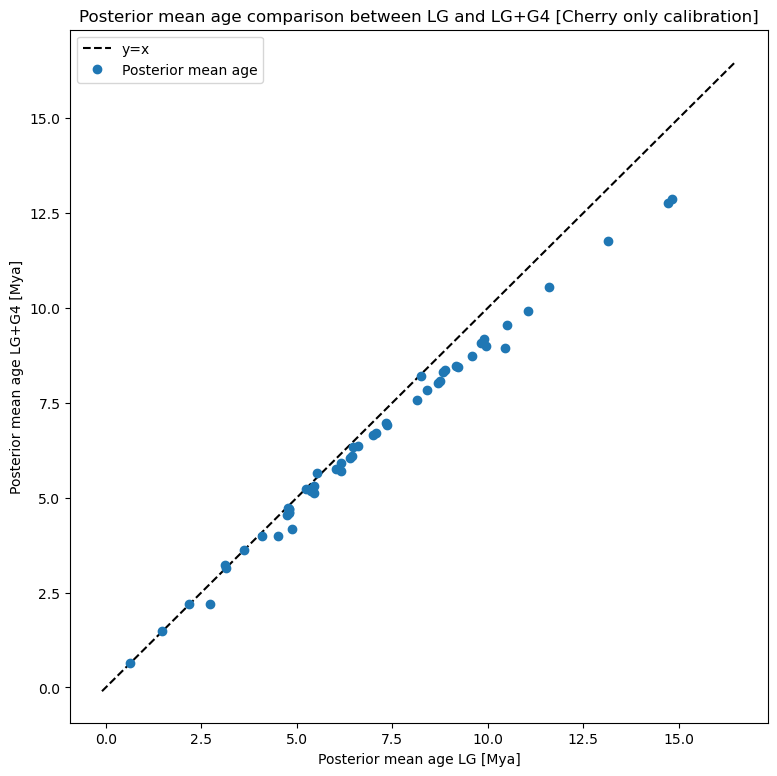

In [41]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,16.5], 
        [-0.1, 16.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Cherry only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_co_scatter.png')

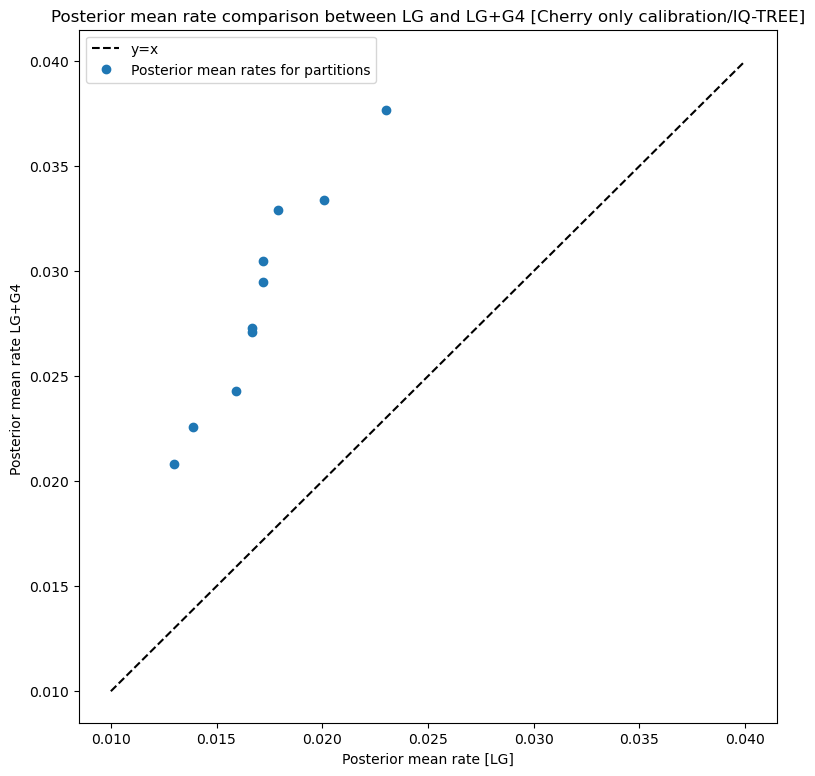

In [42]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.04], 
        [0.01, 0.04], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]')
ax.set_ylabel('Posterior mean rate LG+G4 ')
ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_rate_comparison_LG_G4_co_scatter.png')